# Feature Engineering
# Klassifikation
## Instanzbasierte Modelle
## Regelbasierte Modelle

**Vorbereiten der Umgebung**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

datapath = '../3_data'
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data, prep_demo_data
X_train, X_test, y_train, y_test = prep_data(
    'bank_data_prep.csv', 'y', seed = 1234)

X_demo, y_demo = prep_demo_data('demo_data_class.csv', 'y')

### DecisionTreeClassifier
#### Theorie

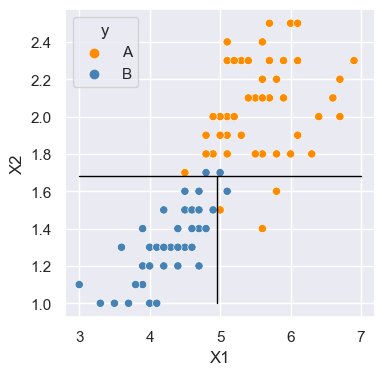

In [5]:
## plot scatterplot and areas for predictions
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x='X1', y='X2', data=X_demo, hue=y_demo,
               palette=['darkorange', 'steelblue'], legend='full')
plt.plot([3, 7], [1.68, 1.68], linewidth=1, color='black')
plt.plot([4.95, 4.95], [1, 1.68], linewidth=1, color='black');

#### Splitting Kriterien

In [7]:
## potential first  split positions
idx = np.unique(X_demo.X1)
for i in range(6):
    ## for formatted output
    print('%2i %4.1f %4.1f %5.2f' % (
        i, idx[i], idx[i+1], (idx[i] + idx[i+1]) / 2))

 0  3.0  3.3  3.15
 1  3.3  3.5  3.40
 2  3.5  3.6  3.55
 3  3.6  3.7  3.65
 4  3.7  3.8  3.75
 5  3.8  3.9  3.85


In [8]:
## check split at X1 < 5
child_l = y_demo[X_demo.X1 < 5]
child_r = y_demo[X_demo.X1 >= 5]
print(pd.Series(child_l).value_counts(sort = False))
print(pd.Series(child_r).value_counts(sort = False))

y
A     5
B    34
Name: count, dtype: int64
y
A    40
B     2
Name: count, dtype: int64


In [9]:
## accuvacy score
pred = np.where(X_demo['X1'] < 5, 'B', 'A')
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_demo)

0.9135802469135802

In [10]:
## control: train model and show first rules
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    min_impurity_decrease=0.02, 
    random_state=1234)
model.fit(X_demo, y_demo)

from sklearn.tree import export_text
print(export_text(
    model, feature_names=list(X_demo.columns)))

|--- X2 <= 1.75
|   |--- X1 <= 5.35
|   |   |--- class: B
|   |--- X1 >  5.35
|   |   |--- class: A
|--- X2 >  1.75
|   |--- class: A



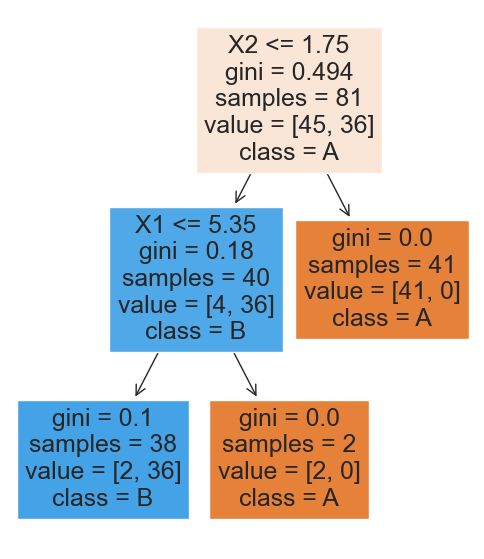

In [11]:
## viszalize tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 7))

plot_tree(model,
          feature_names=X_demo.columns,
          class_names=model.classes_,
          filled=True); # Adds color accoding to class

#### Praxis

In [13]:
## define, parameterize and train the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1234) ## the one parameter (optional)
model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1234)

In [14]:
## apply the model on the train data
y_pred = model.predict(X_test)

In [15]:
## evaluate with model intern scorer (accuracy)
print(model.score(X_test, y_test))

0.8296318831761484


In [16]:
## some more information about the trained model
print('depth:', model.get_depth())
print('n_leaves:', model.get_n_leaves())
print('score on train:', model.score(X_train, y_train))
print('score on test:', model.score(X_test, y_test))

depth: 28
n_leaves: 777
score on train: 1.0
score on test: 0.8296318831761484


#### Abbruchkriterien (early stop)

TREE DIAGNOSTICS:
depth  : 3
leaves : 8
score  : 0.8647497337593184


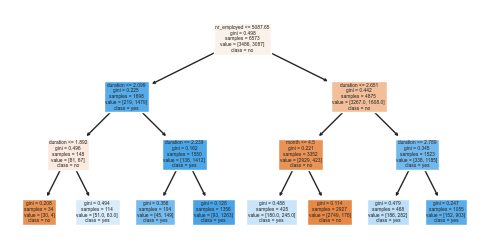

In [18]:
## import from module
from bfh_cas_pml import inspect_decision_tree_model

## test call
inspect_decision_tree_model (
    DecisionTreeClassifier(max_depth = 3), X_train, y_train, figsize = (6, 3))

##### max_depth

TREE DIAGNOSTICS:
depth  : 1
leaves : 2
score  : 0.9506172839506173


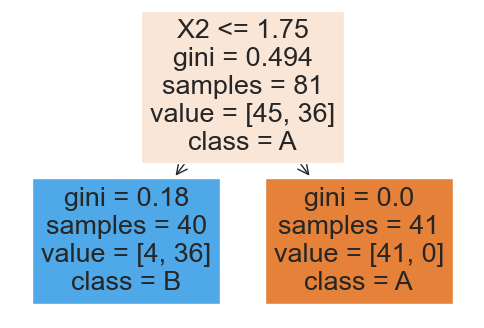

In [20]:
## demo data
## produce trees with depths of 1, 2, 3 for presentation
inspect_decision_tree_model(
    DecisionTreeClassifier(max_depth=1), X_demo, y_demo, figsize = (6, 4))

TREE DIAGNOSTICS:
depth  : 2
leaves : 3
score  : 0.9753086419753086


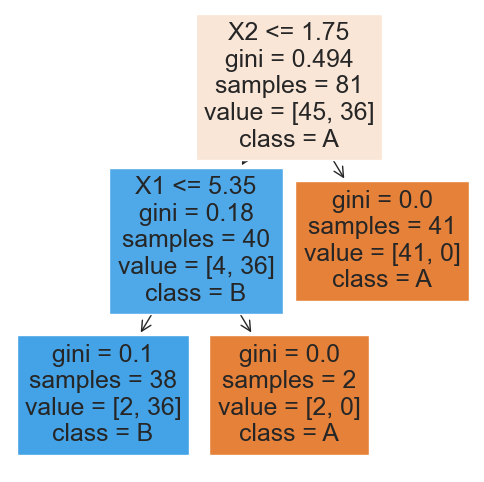

In [21]:
inspect_decision_tree_model (
    DecisionTreeClassifier(max_depth = 2), X_demo, y_demo, figsize = (6, 6))

TREE DIAGNOSTICS:
depth  : 3
leaves : 4
score  : 0.9753086419753086


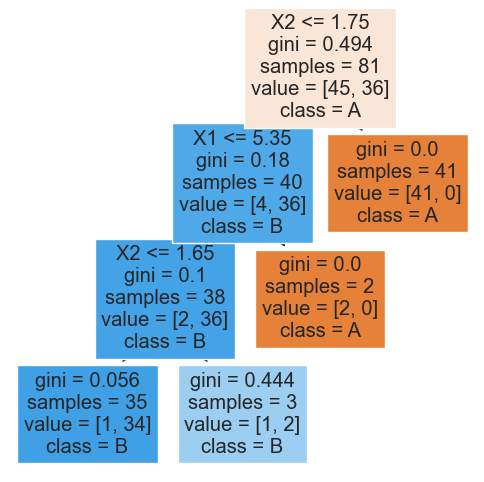

In [22]:
inspect_decision_tree_model (
    DecisionTreeClassifier(max_depth = 3), X_demo, y_demo, figsize = (6, 6))

TREE DIAGNOSTICS:
depth  : 3
leaves : 8
score  : 0.8647497337593184


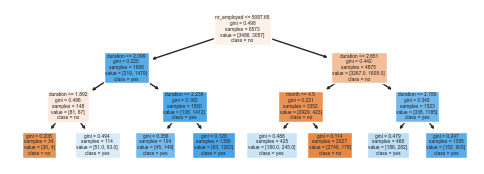

In [23]:
## bank customer dataset with depth = 5
inspect_decision_tree_model (
    DecisionTreeClassifier(max_depth = 3), X_train, y_train, figsize = (6, 2))

##### min_samples_split

TREE DIAGNOSTICS:
depth  : 1
leaves : 2
score  : 0.9506172839506173


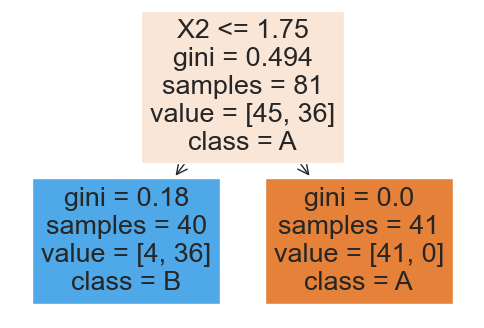

In [25]:
## demo dataset
inspect_decision_tree_model (
    DecisionTreeClassifier(min_samples_split = 41), X_demo, y_demo, figsize = (6, 4))

TREE DIAGNOSTICS:
depth  : 2
leaves : 3
score  : 0.9753086419753086


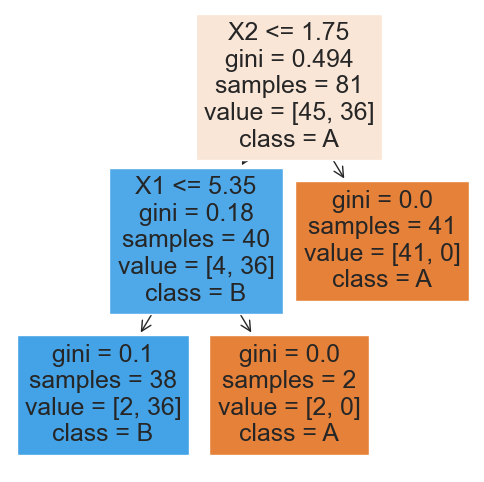

In [26]:
## demo dataset
inspect_decision_tree_model(
    DecisionTreeClassifier(min_samples_split = 40), X_demo, y_demo, figsize = (6, 6))

##### min_samples_leaf

TREE DIAGNOSTICS:
depth  : 2
leaves : 3
score  : 0.9506172839506173


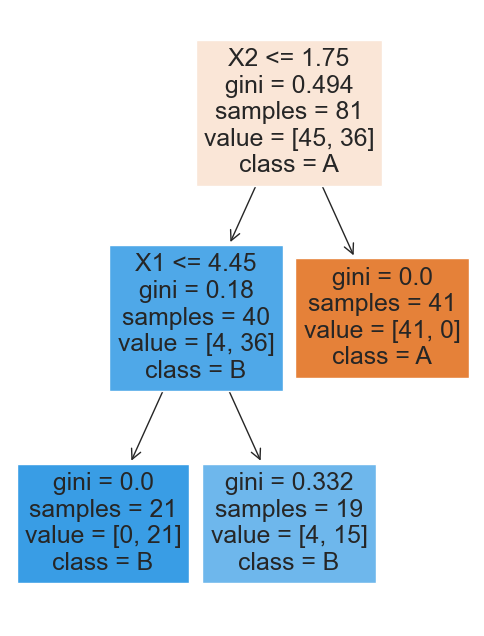

In [28]:
## demo dataset
inspect_decision_tree_model(
    DecisionTreeClassifier(min_samples_leaf = 10), X_demo, y_demo, figsize = (6, 8))

TREE DIAGNOSTICS:
depth  : 3
leaves : 4
score  : 0.9629629629629629


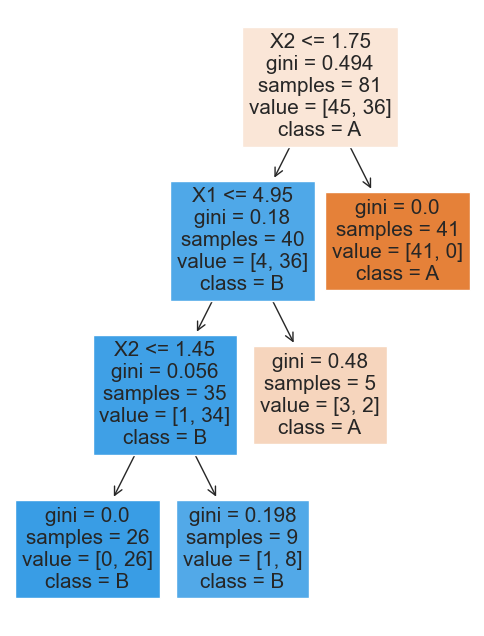

In [29]:
## demo dataset
inspect_decision_tree_model(
    DecisionTreeClassifier(min_samples_leaf = 5), X_demo, y_demo, figsize = (6, 8))

##### max_leaf_nodes

TREE DIAGNOSTICS:
depth  : 4
leaves : 5
score  : 0.9876543209876543


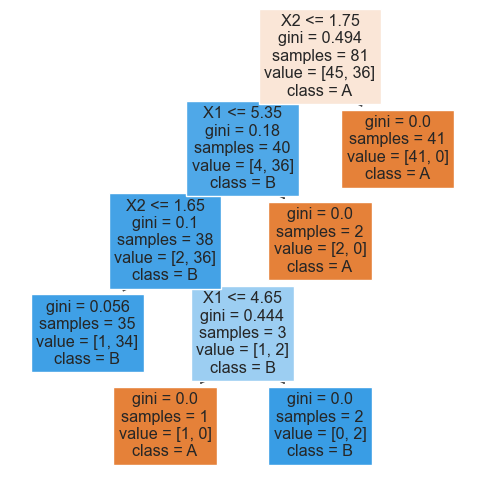

In [31]:
## demo dataset
inspect_decision_tree_model(
    DecisionTreeClassifier(max_leaf_nodes = 5), X_demo, y_demo)

##### min_impurity_decrease

TREE DIAGNOSTICS:
depth  : 2
leaves : 3
score  : 0.9753086419753086


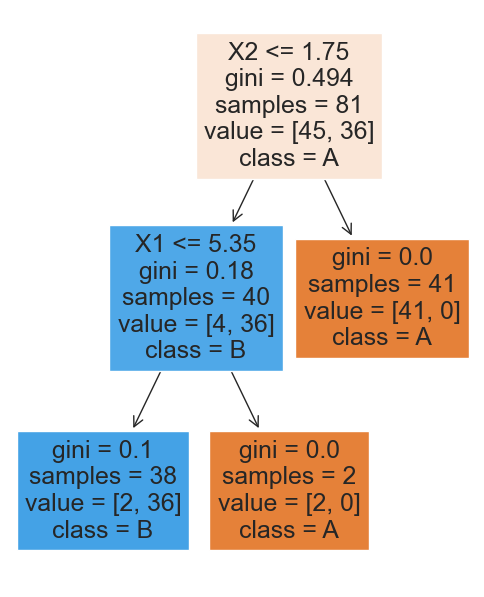

In [33]:
## demo dataset
inspect_decision_tree_model(
    DecisionTreeClassifier(min_impurity_decrease = 0.042), X_demo, y_demo, figsize = (6, 7.5))

TREE DIAGNOSTICS:
depth  : 1
leaves : 2
score  : 0.9506172839506173


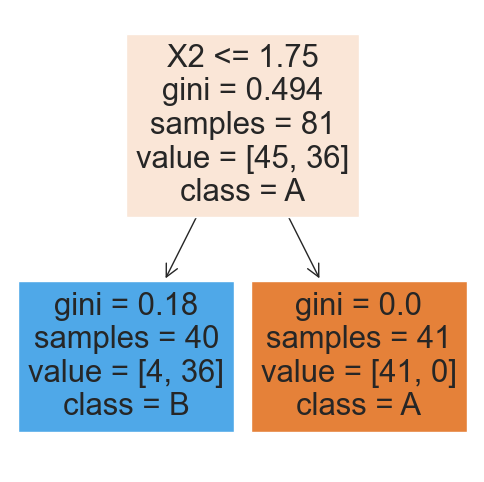

In [34]:
inspect_decision_tree_model (
    DecisionTreeClassifier(min_impurity_decrease = 0.043), X_demo, y_demo)

#### Parameter Tuning

In [36]:
## max_depth in 1:20, incl. visualization
## prepare loop
model = DecisionTreeClassifier()
scores = []            ## empty list for collect iteration scorers
params = range(1, 21)  ## define range

## iteration over params
for param in params:
    model.set_params(max_depth = param)
    model.fit(X_train, y_train) 
    score = model.score(X_test, y_test)
    scores.append(score) ## add score to list
    print(score)         ## optional: progress display

0.7064192272588987
0.8436264070581077
0.8594463036203225
0.8615759050806207
0.8621843626407059
0.869485853361728
0.8661393367812595
0.8582293885001521
0.8582293885001521
0.8524490416793429
0.8524490416793429
0.847885609978704
0.8436264070581077
0.847885609978704
0.8390629753574688
0.8414968055978096
0.8363249163370855
0.8271980529358077
0.8314572558564041
0.8332826285366596


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


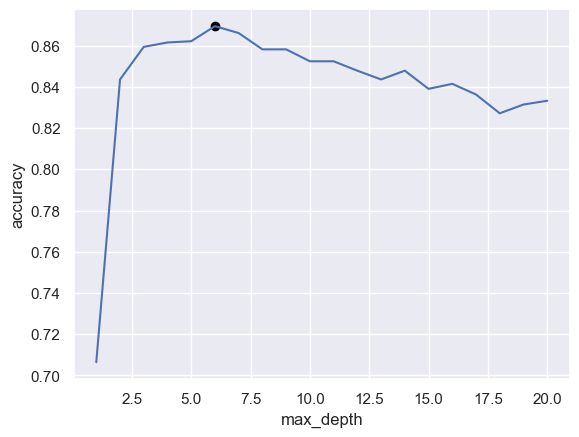

In [37]:
fig = sns.lineplot(x=params, y=scores)
plt.scatter(x=params[scores.index(max(scores))], y=max(scores), color="black")
plt.xlabel('max_depth')
plt.ylabel('accuracy');

In [38]:
## show best parameter value and best score
print('best_param :', params[scores.index(max(scores))])
print('best_score :', max(scores))

best_param : 6
best_score : 0.869485853361728


#### Overfitting, ein Ausblick

In [40]:
## compare tran and test errors
model = DecisionTreeClassifier()

scores_test = []
scores_train = []
params = range(1, 21)

for param in params:
    model.set_params(max_depth=param)
    model.fit(X_train, y_train) 
    scores_test.append(model.score(X_test, y_test))
    scores_train.append(model.score(X_train, y_train))

C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

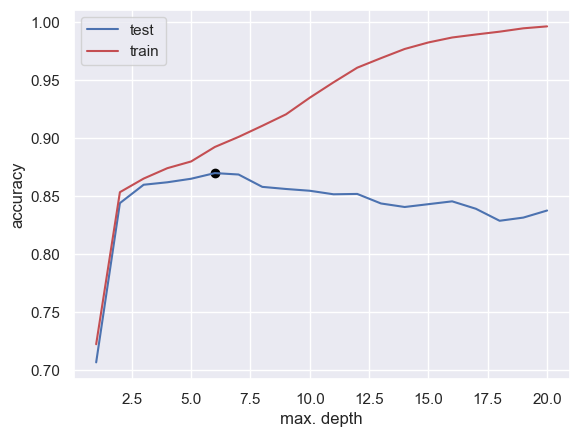

In [41]:
fig, ax = plt.subplots()
sns.lineplot(x=params, y=scores_test, ax=ax, label='test', color='b')
sns.lineplot(x=params, y=scores_train, ax=ax, label='train', color='r')
plt.scatter(x=params[scores_test.index(max(scores_test))], y=max(scores_test), color="black")
ax.set(xlabel='max. depth', ylabel='accuracy');

#### Feature Importance

In [43]:
## train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [44]:
## output of feature_importances_
print(X_train.columns)
print(model.feature_importances_)

Index(['age', 'education', 'housing', 'contact_cellular', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'loan_unknown', 'loan_yes'],
      dtype='object')
[0.048644   0.02157469 0.00943852 0.00770252 0.06711722 0.02773772
 0.3986482  0.02607345 0.00733212 0.00819574 0.00556292 0.01631865
 0.01022407 0.06025339 0.23338814 0.00470913 0.00339763 0.00239168
 0.00271819 0.00657916 0.00222671 0.00610139 0.0037505  0.00475672
 0.00135005 0.00404197 0.00271887 0.00121896 0.00582769]


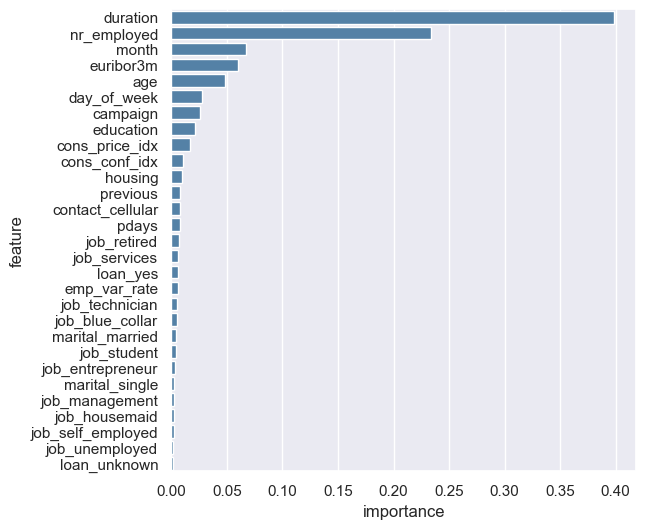

In [45]:
## visualization
## collect values in another data frame
best = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})

## sort in descending order
best = best.sort_values(by=['importance'], ascending=False)

## plot
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='importance', y='feature', data=best, color='steelblue');

In [46]:
## create Series of names for 10 best feaures
sel_vars = best.head(10).feature

## filter
X_train_new = X_train[sel_vars]
X_test_new = X_test[sel_vars]

## check
print(X_train_new.info())
print(X_test_new.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6573 entries, 2751 to 8915
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration        6573 non-null   float64
 1   nr_employed     6573 non-null   float64
 2   month           6573 non-null   int64  
 3   euribor3m       6573 non-null   float64
 4   age             6573 non-null   float64
 5   day_of_week     6573 non-null   int64  
 6   campaign        6573 non-null   float64
 7   education       6573 non-null   int64  
 8   cons_price_idx  6573 non-null   float64
 9   cons_conf_idx   6573 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 564.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 2809 to 9060
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration        3287 non-null   float64
 1   nr_employed     3287 non-null   float64
 2   month   

### RandomForestClassifier 
#### Theorie

kein Code zu diesem Kapitel

#### Praxis

In [50]:
## prepare env
## (already done)

In [51]:
## import trainer class
from sklearn.ensemble import RandomForestClassifier

In [52]:
## define and train model
model = RandomForestClassifier(random_state = 1234)
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=1234)

In [53]:
## effective parameters
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1234, 'verbose': 0, 'warm_start': False}


In [54]:
## score with model intern scorer
print(model.score(X_test, y_test))

0.8749619714024947


In [55]:
## additional information
print('model.n_classes_     :', model.n_classes_)
print('model.classes_       :', model.classes_)
print('model.n_features_in_ :', model.n_features_in_)
print('model.n_outputs_     :', model.n_outputs_)

## this later
## print(model.feature_importances_)

model.n_classes_     : 2
model.classes_       : ['no' 'yes']
model.n_features_in_ : 29
model.n_outputs_     : 1


In [56]:
## oob_score_
model = RandomForestClassifier(random_state = 1234, oob_score = True)
model.fit(X_train, y_train) 
print('model.oob_score_:', model.oob_score_)
#print('model.oob_decision_function_', model.oob_decision_function_)

model.oob_score_: 0.8869618134793854


#### Parameter tuning

kein Code zu diesem Kapitel

#### Feature importance

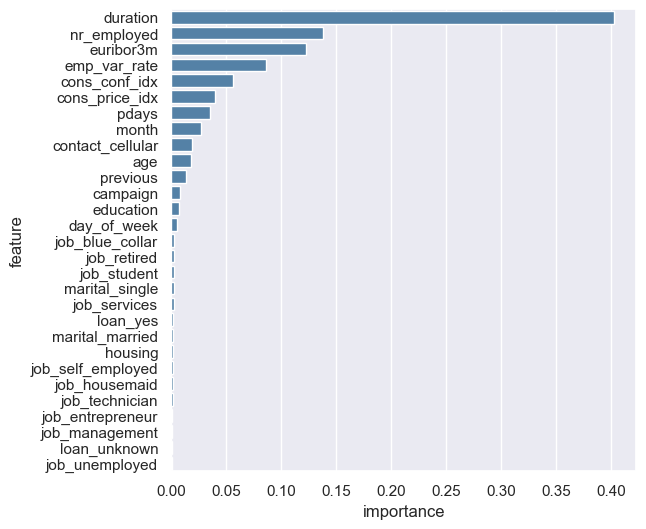

In [59]:
## full model with the found parameter values
model = RandomForestClassifier(
    n_estimators = 200, 
    max_depth = 7)
model.fit(X_train, y_train)

## visualization
## collect values in data frame
best = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})
## sort in descending order
best = best.sort_values(by=['importance'], ascending=False)
## plot
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='importance', y='feature', data=best, color='steelblue');

#### Parallelisiete Ausführung mit n_jobs

In [61]:
from sklearn.ensemble import RandomForestClassifier
import time

jobs = [None, 1, -1]

for j in jobs:
    start_time = time.time()
    model = RandomForestClassifier(n_jobs = j, random_state=1234)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    t = time.time() - start_time  ## used time
    print(j, t)

None 1.9632258415222168
1 1.7313072681427002
-1 0.850548505783081


### AdaBoostClassifier
#### Theorie
#### Praxis

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
model = AdaBoostClassifier(algorithm='SAMME')
model.fit(X_train, y_train) 
print(model.score(X_test, y_test))

0.8539701855795558


In [64]:
print(model.get_params())

{'algorithm': 'SAMME', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


In [65]:
## weitere Informationen zum modell
print(model.estimator_)

DecisionTreeClassifier(max_depth=1)


### GradientBoostingClassifier
#### Theorie

kein Code für dieses Kapitel

#### Praxis

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train) 
print(model.score(X_test, y_test))

0.8767873440827503


### HistGradientBoostingClassifier

In [71]:
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train) 
print(model.score(X_test, y_test))

C:\Users\werne\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\werne\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


0.8819592333434743


### Weitere Methoden
kein Code für dieses Kapitel

### Modellvergleiche (zum ersten)

install optional further classifiers
* catboost, ref: https://catboost.ai/docs/concepts/about.html
  
        !pip install catboost


* LGBMClassifier, ref: https://lightgbm.readthedocs.io/en/latest/Installation-Guide.html
  
        !pip install lightgbm

  
* XGBoost, ref: https://xgboost.readthedocs.io/en/stable/index.html

        !pip install xgboost

In [75]:
## import trainer classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier

import time ## for timekeeping

In [76]:
## define models
models = [
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(min_impurity_decrease=0.002),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(algorithm='SAMME'),
    GradientBoostingClassifier(),
    HistGradientBoostingClassifier(),    
    CatBoostClassifier(logging_level='Silent'), ## optional
    LGBMClassifier() ## optional
]

In [77]:
## to collect the results
scores = []
used_times = []
model_names = []

In [78]:
## report titel
print('Classifier                         Score    Time')
print('==================================================')

## iteration over models
for model in models:
    start_time = time.time()             ## start timer
    model.fit(X_train, y_train)          ## train
    name = model.__class__.__name__      ## pick model name (for output only)
    score = model.score(X_test, y_test)  ## calculate score
    t = time.time() - start_time         ## calculate used time

    ## collect iteration results
    scores.append(score)
    used_times.append(t)
    model_names.append(name)
    print('%-32s   %6.4f   %6.3f' % (name, score, t))  ## console output

Classifier                         Score    Time
KNeighborsClassifier               0.7493    1.156
DecisionTreeClassifier             0.8588    0.049
RandomForestClassifier             0.8756    3.640
AdaBoostClassifier                 0.8540    1.261
GradientBoostingClassifier         0.8768    2.471
HistGradientBoostingClassifier     0.8820    1.221
CatBoostClassifier                 0.8829   11.607
[LightGBM] [Info] Number of positive: 3087, number of negative: 3486
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 6573, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.469649 -> initscore=-0.121555
[LightGBM] [Info] Start training from score -0.121555
LGBMClassifier                     0.885

In [79]:
## final evaluation
print('best_model :', model_names[scores.index(max(scores))])
print('best_score :', max(scores))
print('used_time  :', used_times[scores.index(max(scores))])

best_model : LGBMClassifier
best_score : 0.8850015211439002
used_time  : 0.4831733703613281


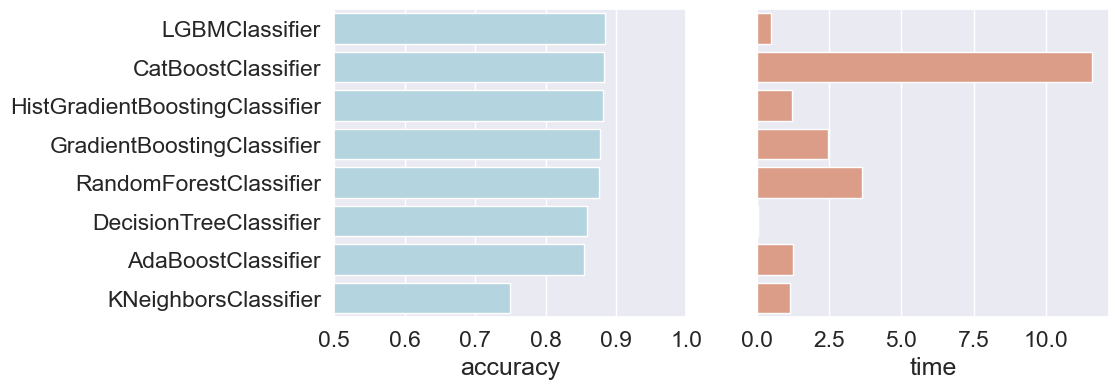

In [80]:
## vizualisation, ordered by decreasing accuracy

results = pd.DataFrame({
    'models' : model_names,
    'scores' : scores,
    'used_times' : used_times}
).sort_values(by='scores', ascending=False)
#print(results)

order = results.sort_values('scores', ascending=False).models

sns.set(font_scale=1.5) 
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=False)

ax = sns.barplot(data=results, x=scores, y=model_names, color='lightblue', order=order, ax=axes[0])
ax.set_xlabel('accuracy')
ax.set(xlim=(0.5, 1))

ax = sns.barplot(x=used_times, y=model_names, color='darksalmon', order=order, ax=axes[1])
ax.set_xlabel('time')
ax.set_yticklabels('')
ax.set_ylabel('');